# Исследование рынка общественного питания в Москве

- Автор: Новикова Полина
- Дата: 14.03.2025

### Цели и задачи проекта

<font color='#777778'> **Цель:** Провести исследовательский анализ данных общественного питания в Москве, с целью открытия компанией "Shut Up and Take My Money" новой точки. Для этого мы проанализируем несколько факторов, таких как сколько всего заведения общественного питания, в каком районе они расположены, какой их средний рейтинг и средний чек  и тд.
</font>

### Описание данных

<font color='#777778'>Для анализа поступили данные с заведениями общественного питания Москвы, составленный на основе информации сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. Данные состоят из двух датасетов:
- `/datasets/rest_info.csv` - информация о заведениях общественного питания;
- `/datasets/rest_price.csv` - информация о среднем чеке в заведениях общественного питания. 
    
    **Описание датасета `rest_info.csv`:**
- `name` — название заведения;
- `address` — адрес заведения;
- `district` — административный район, в котором находится заведение, например Центральный административный округ;
- `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- `hours` — информация о днях и часах работы;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки): 
 - 0 — заведение не является сетевым;
 - 1 — заведение является сетевым.
- `seats` — количество посадочных мест.
    
    **Описание датасета `rest_price.csv`:**
- `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например: 
 - «Средний счёт: 1000–1500 ₽»;
 - «Цена чашки капучино: 130–220 ₽»;
 - «Цена бокала пива: 400–600 ₽» и так далее;
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки «Средний счёт»: 
 - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
 - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
 - Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки «Цена одной чашки капучино»: 
 - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
 - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
 - Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.</font>

### Содержимое проекта
<font color='#777778'>
    
1. Загрузка данных и знакомство с ними.

2. Предобработка данных.

3. Исследовательский анализ данных.

4. Итоговый вывод и рекомендации.</font>

---

## Загрузка данных и знакомство с ними

Начнем с загрузки необходимых для анализа библиотек. Затем загрузим данные о заведениях общественного питания Москвы. Путь к файлам: `/datasets/rest_info.csv` и `/datasets/rest_price.csv`.

In [1]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
!pip install phik
from phik import phik_matrix

     |████████████████████████████████| 686 kB 1.2 MB/s eta 0:00:01


In [2]:
# Выгружаем данные в переменные rest_info и rest_price
rest_info = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
rest_price = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

Познакомимся с данными датафреймов и изучим общую информацию о них.

In [3]:
# Выводим первые строки датафрейма на экран
rest_info.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [4]:
# Выводим информацию о датафрейме
rest_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


Датафрейм `rest_info` содержит 9 столбцов и 8406 строк, в которых представлена информация о заведениях общественного питания в Москве.
После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов приведены к одному стилю;
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию. Большинство столбцов приведены к типу `object`, кроме столбцов:
  - "rating" и "seats" приведены к типу `float64`, что соответсвует логике.
  - "chain" представлен целым числом (`in64`), однако в данном столбце значение это признак (где 0 - заведение не является сетевым, 1 - заведение является сетевым). Поэтому размерность данного столбца стоит оптимизировать.
- Пропуски содержатся только в столбцах "hours" и "seats". Однако следует проверить и другие столбцы: в них могут встречаться значения-индикаторы, которые будут говорить об отсутствии данных.

Теперь познакомимся с данными датафрейма `rest_price`.

In [5]:
# Выводим первые строки датафрейма на экран
rest_price.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [6]:
# Выводим информацию о датафрейме
rest_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


Датафрейм `rest_price` содержит 5 столбцов и 4058 строк, в которых представлена информация о заведениях общественного питания в Москве.
После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов приведены к одному стилю;
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию. Большинство столбцов приведены к типу `object`, что соответсвует логике. Однако столбцы "middle_avg_bill" и "middle_coffee_cup" относятся к типу `float64`, данные столбцы не нужно преобразовывать. 
- Пропуски содержатся в столбцах "price", "avg_bill", "middle_avg_bill" и "middle_coffee_cup". Однако следует проверить и другие столбцы: в них могут встречаться значения-индикаторы, которые будут говорить об отсутствии данных.

### **Подготовка единого датафрейма**

Объединим данные двух датасетов в один, с которым продолжим работу.

Соединим данные, используя в качестве ключа столбец `id`, а также значение параметра `how` равное `'outer'`. Это позволит объединить данные, ничего не потеряв.

In [7]:
# Соединяем данные в единый датафрейм df
df = rest_info.merge(rest_price, how ='outer', on='id')
display(df)

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8401,0342ad1a45ed41ba89dcba246a8267e5,Суши Мания,кафе,"Москва, Профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",4.4,0,86.0,NaN,NaN,NaN,NaN
8402,ee6bb7c3650e47bd8186fca08eda1091,Миславнес,кафе,"Москва, Пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",4.8,0,150.0,NaN,NaN,NaN,NaN
8403,62e8c64d4c89467aba608e39ef87616b,Самовар,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",3.9,0,150.0,NaN,Средний счёт:от 150 ₽,150.0,NaN
8404,06a0db5ecd4842d48cd6350aa923e297,Чайхана Sabr,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",4.2,1,150.0,NaN,NaN,NaN,NaN


In [8]:
# Выводим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


Данные соединены, и нужная информация сохранилась.

---

## Предобработка данных

Подготовьте данные к исследовательскому анализу:

1. С данными заведений работы не так много — понадобится только провести оптимизацию целочисленных данных. Для оптимизации будем использовать метод `pd.to_numeric` с аргументом `downcast='integer'`:

In [9]:
# Оптимизируем целочисленный тип данных в датафрейме df
df['chain'] = pd.to_numeric(df['chain'], downcast='integer')

In [10]:
# Проверим типы данных в датафрейме df с помощью атрибута dtypes
df.dtypes

id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float64
chain                   int8
seats                float64
price                 object
avg_bill              object
middle_avg_bill      float64
middle_coffee_cup    float64
dtype: object

Типы данных были успешно оптимизированы с понижением размерности целочисленных данных.

2. При первичном анализе мы обнаружили пропуски в некоторых столбцах. Узнаем абсолютное и относительное количество пропусков в этом столбце.

In [11]:
# Применяем метод isna() к датафрейму df
df_isna = df.isna().sum().sort_values(ascending = False)
print(df_isna)

middle_coffee_cup    7871
middle_avg_bill      5257
price                5091
avg_bill             4590
seats                3611
hours                 536
id                      0
name                    0
category                0
address                 0
district                0
rating                  0
chain                   0
dtype: int64


In [12]:
# Подсчитываем процент строк с пропусками
round((df_isna / df.shape[0] * 100), 2)

middle_coffee_cup    93.64
middle_avg_bill      62.54
price                60.56
avg_bill             54.60
seats                42.96
hours                 6.38
id                    0.00
name                  0.00
category              0.00
address               0.00
district              0.00
rating                0.00
chain                 0.00
dtype: float64

В датафрейме `df` были обнаружены пропуски в следующих столбцах:
- `middle_coffee_cup` - в 7871 строке (93,64% от всех данных).
- `middle_avg_bill` - в 5257 строках (62,54% от всех данных). 
- `price` - в 5091 строке (60,56% от всех данных). 
- `avg_bill` - в 4590 строках (54,60% от всех данных). 
- `seats` - в 3611 строке (42,96% от всех данных). 
- `hours ` - в 536 строках (6,38% от всех данных). 

Гипотеза о причине пропусков следующая: скорее всего на этапе сбора или импорта потерялась часть данных. Поэтому пропуски лучше оставить как есть, т.к. их заполнение может искажать анализ.

3. Проверим данные на наличие явных и неявных дубликатов. Начнём с полных дубликатов:

In [13]:
# Проверяем полные дубликаты в датафрейме df
df.duplicated().sum()

0

В датафрейме нет полных дубликатов строк. Проверим неявные дубликаты — значения по `id`.

In [14]:
# Проверяем неявные дубликаты в датафрейме df
df.duplicated(subset='id').sum()

0

Тут тоже всё хорошо — каждая строка соответствует уникальному заведению. Теперь проверим корректность написания категориальных значений.

In [15]:
# Названия и адрес заведения можно привести к нижнему регистру, для дальнейшего анализа
df['name'] = df['name'].str.lower()
df['address'] = df['address'].str.lower()

In [16]:
# Проверяем дубликаты в названии и адресе заведения
df.duplicated(subset=['name', 'address']).sum()

4

In [17]:
# Удалим неявные дубликаты в названии и адресе заведения
df = df.drop_duplicates(subset=['name', 'address'])

In [18]:
# Проверим сколько строк осталось
df.shape[0]

8402

In [19]:
# Проверяем уникальные значения в категориальных столбцах
for column in ['district', 'category', 'hours', 'price']:
    print(f'Уникальные значения в столбце {column}:')
    print(df[column].sort_values().unique())
    print()

Уникальные значения в столбце district:
['Восточный административный округ' 'Западный административный округ'
 'Северный административный округ'
 'Северо-Восточный административный округ'
 'Северо-Западный административный округ'
 'Центральный административный округ'
 'Юго-Восточный административный округ'
 'Юго-Западный административный округ' 'Южный административный округ']

Уникальные значения в столбце category:
['бар,паб' 'булочная' 'быстрое питание' 'кафе' 'кофейня' 'пиццерия'
 'ресторан' 'столовая']

Уникальные значения в столбце hours:
['Нет информации'
 'вт 08:30–17:00; ср,чт 12:00–20:30; пт 08:30–17:00; сб 09:00–16:30'
 'вт 13:00–21:00; ср 11:00–20:00; чт 13:00–21:00; пт-вс 11:00–20:00' ...
 'чт круглосуточно, перерыв 10:00–20:00; сб круглосуточно'
 'чт-вс 20:00–06:00' nan]

Уникальные значения в столбце price:
['высокие' 'выше среднего' 'низкие' 'средние' nan]



При анализе не было выведено неявных дубликатов в категориальных столбцах.

4. Для дальнейшей работы создайте столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [20]:
# Пишем функцию для определения работы заведения 24/7
def work(hours):
    if pd.isna(hours):
        return False
    elif 'ежедневно' in hours and 'круглосуточно' in hours:
        return True
    else:
        return False
# Создаем новый столбец "is_24_7", применяя функцию
df['is_24_7'] = df['hours'].apply(work)

In [21]:
# Проверяем получившиеся данные
df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,wowфли,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN,False
1,045780ada3474c57a2112e505d74b633,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,False
2,1070b6b59144425896c65889347fcff6,хазри,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN,False
3,03ac7cd772104f65b58b349dc59f03ee,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,False
4,a163aada139c4c7f87b0b1c0b466a50f,иль марко,пиццерия,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN,False


**Промежуточный вывод**

После предобработки данных напишите промежуточный вывод о проведённой работе. Отразите количество или долю отфильтрованных данных, если вы что-то удаляли.

В результате предобработки данных были выполнены следующие действия:
- Оптимизирован столбец `chain` с `int64` на `int8`. 
- Изучены пропуски в данных. Учитывая в каких столбцах они нашлись, пропуски могут отражать особенности заведений и не являться ошибкой в данных. Поэтому их оставили как есть.
- Данные проверили на явные и неявные дубликаты. Удалили в столбцах названия и адреса заведения.
---

## Исследовательский анализ данных
Проведите исследовательский анализ исходных данных.

При исследовании данных используйте визуализации. Проверьте, что для каждого случая подобран оптимальный тип визуализации с корректным оформлением. У графика должен быть заголовок, понятные подписи по осям, при необходимости легенда, а его размер является оптимальным для изучения.

После исследования каждого пункта оставляйте небольшой комментарий с выводом или обсуждением результата. В конце шага обобщите результаты, выделив, по вашему мнению, самые важные.

---

### Задача 1

Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по каждой категории. Результат сопроводите подходящей визуализацией.

In [22]:
# Проверяем распределение данных по значениям столбца category
print('Распределение данных по значениям столбца category:')
df['category'].value_counts()

Распределение данных по значениям столбца category:


кафе               2376
ресторан           2042
кофейня            1413
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

Результаты показывают, что всего в этом столбце 8 уникальных значений. При этом только 3 категории имеют значения больше 1000. Это значит, что категории распределены неравномерно между количеством заведений, и это накладывает свои ограничения на сравнение групп между собой.

Для визуального анализа такого распределения можно использовать столбчатые диаграммы. Визуализируем распределение в столбце `category`: 

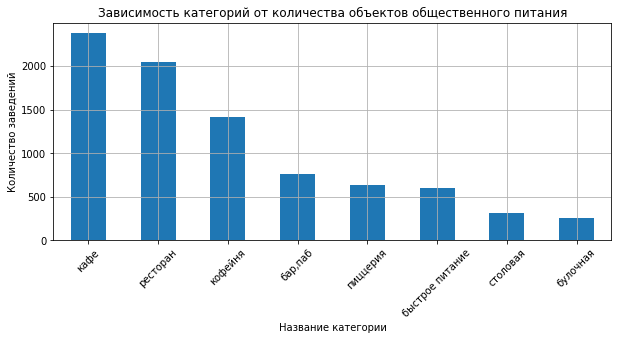

In [23]:
# Строим столбчатую диаграмму
plt.figure(figsize=(10, 4))
df['category'].value_counts().plot(kind='bar', 
                                   rot = 45,
                                  legend=False,
                                  title=f'Зависимость категорий от количества объектов общественного питания')
plt.xlabel('Название категории')
plt.ylabel('Количество заведений')
plt.grid()
plt.show()

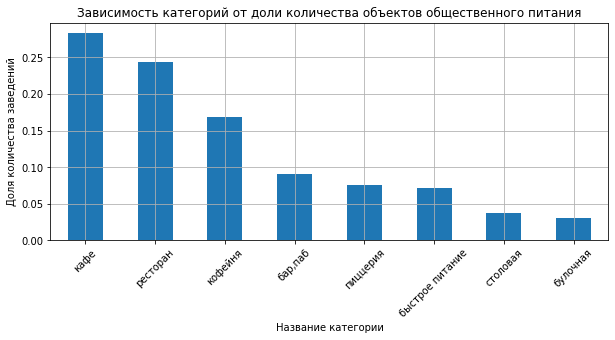

In [24]:
# Строим столбчатую диаграмму 
plt.figure(figsize=(10, 4))
df['category'].value_counts(normalize=True).plot(kind='bar', 
                                   rot = 45,
                                  legend=False,
                                  title=f'Зависимость категорий от доли количества объектов общественного питания')
plt.xlabel('Название категории')
plt.ylabel('Доля количества заведений')
plt.grid()
plt.show()

Визульно видно, что категории "кафе"(более 25% от всех заведений) и "ресторан"(почти 25% от всех заведений) сильно выделяются на фоне остальных (количество более 2000). А категории "столовая" и "булочная" имеют наименьшее количество - менее 500(меньше 5% от всего количества заведений).  

---

### Задача 2

Какие административные районы Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводите подходящими визуализациями.

In [25]:
# Выводим названия и проверяем распределение данных по значениям столбца district
print('Распределение данных по значениям столбца district:')
df['district'].value_counts()

Распределение данных по значениям столбца district:


Центральный административный округ         2242
Северный административный округ             898
Южный административный округ                892
Северо-Восточный административный округ     890
Западный административный округ             850
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: district, dtype: int64

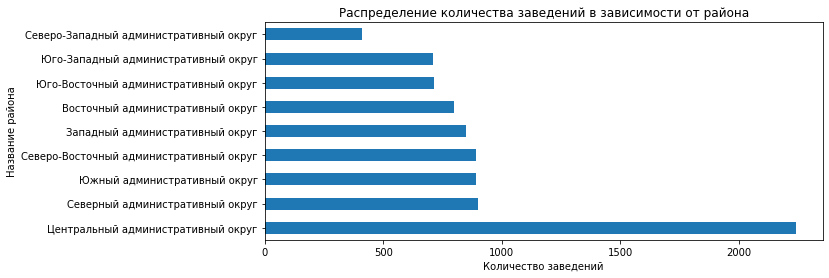

In [26]:
# Визуализируем полученные данные
plt.figure(figsize=(10, 4))
df['district'].value_counts().plot(kind='barh', 
                                   rot = 0,
                                  legend=False,
                                  title=f'Распределение количества заведений в зависимости от района')
plt.xlabel('Количество заведений')
plt.ylabel('Название района')
plt.show()

Можно заметить, что наибольшее количество заведений находится в Центральном административном округе Москвы. Поэтому отдельно проанализируем этот район на распределение заведений по каждой категории.

In [27]:
#Фильтруем данные, оставляем только Центральный административный округ 
central_df=df[df['district']== "Центральный административный округ"]
print('Распределение новых данных по значениям столбца category:')
central_df['category'].value_counts()

Распределение новых данных по значениям столбца category:


ресторан           670
кафе               464
кофейня            428
бар,паб            364
пиццерия           113
быстрое питание     87
столовая            66
булочная            50
Name: category, dtype: int64

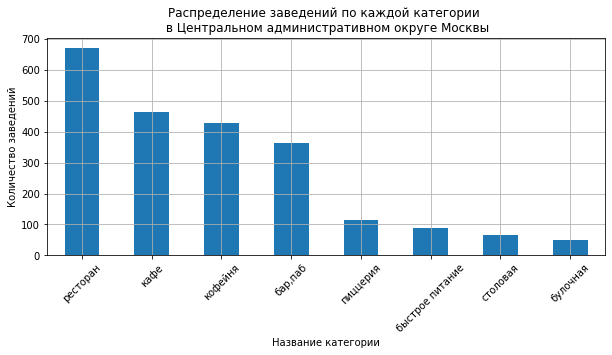

In [28]:
# Строим столбчатую диаграмму
plt.figure(figsize=(10, 4))
central_df['category'].value_counts().plot(kind='bar', 
                                   rot = 45,
                                  legend=False,
                                  title=f'Распределение заведений по каждой категории \n в Центральном административном округе Москвы')
plt.xlabel('Название категории')
plt.ylabel('Количество заведений')
plt.grid()
plt.show()

Стоить отметить, что в Центральном районе ситуация немного отличается от всей Москвы в целом. Так, больше всего заведений находится в категории "ресторан", а потом уже "кафе" (противоположная ситуация). В целом другое соотношение совпадает.

---

### Задача 3

Изучите соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуйте данные, ответьте на вопросы и постройте необходимые визуализации.

In [29]:
# Найдем доли сетевых и несетевых заведений в целом
print(f'Распределение данных по значениям столбца chain:')
print(df['chain'].value_counts(normalize=True))

Распределение данных по значениям столбца chain:
0    0.618781
1    0.381219
Name: chain, dtype: float64


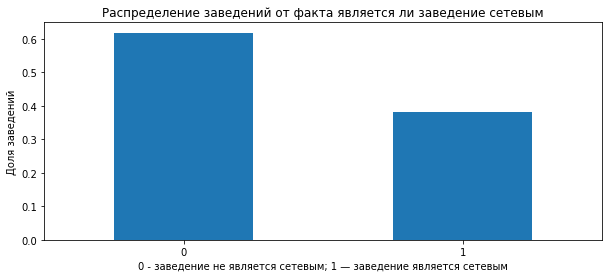

In [30]:
# Визуализируем полученные данные
plt.figure(figsize=(10, 4))
df['chain'].value_counts(normalize=True).plot(kind='bar',
                                              rot = 0,
                                              legend=False, 
                                              title=f'Распределение заведений от факта является ли заведение сетевым')
plt.xlabel('0 - заведение не является сетевым; 1 — заведение является сетевым')
plt.ylabel('Доля заведений')
plt.show()

Судя по результатам, чуть больше 60% заведений не являются сетевыми.

Проанализируем соотношение сетевых и несетевых заведений в разрезе категорий заведения.

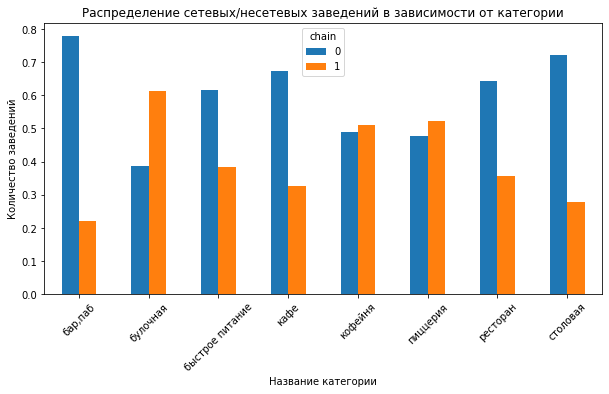

In [31]:
# Построим график столбчатой диаграммы
grouped = df.groupby('category')['chain'].value_counts(normalize=True).unstack(fill_value=0)
grouped.plot(kind='bar',
               title=f'Распределение сетевых/несетевых заведений в зависимости от категории',
               legend=True,
               ylabel='Количество заведений',
               xlabel='Название категории',
               rot=45,
               figsize=(10, 5))
plt.show()

Можно сделать вывод, что по долевому соотношению чаще всего такие категории как: "булочная", "кофейня", "пиццерия" - являются сетевыми.

---

### Задача 4

Исследуйте количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведите для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводите подходящими визуализациями.


In [32]:
# Изучаем статистические показатели столбца seats
print('Статистические показатели столбца seats:')
df['seats'].describe()

Статистические показатели столбца seats:


count    4792.000000
mean      108.361436
std       122.841130
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

При первичном анализе статистических показателей, можно заметить что среднее значение (108) больше медианы(75).Это говорит о том, что распределение данных имеет перекос вправо. Это означает, что с правой стороны дистрибутива есть «хвост». 
    
Чтобы убедиться в этом дополнительно построим гистограмму распределения значений и диаграмму размаха.

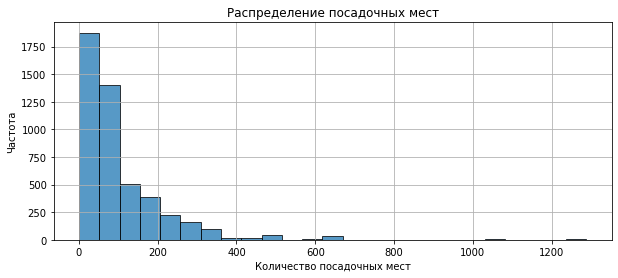

In [33]:
# Строим гистограмму распределения
plt.figure(figsize=(10, 4))
df['seats'].plot(
                kind='hist',
                bins=25, 
                alpha=0.75,
                edgecolor='black',
                rot=0)
plt.title('Распределение посадочных мест')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Частота')
plt.grid()
plt.show()

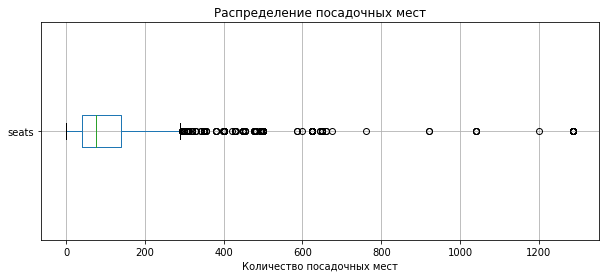

In [34]:
# Строим диаграмму размаха значений
plt.figure(figsize=(10, 4))
df.boxplot(column='seats', vert=False)
plt.title('Распределение посадочных мест')
plt.xlabel('Количество посадочных мест')
plt.show()

Анализ показал, что распределение посадочных мест асимметричное, скошенное вправо. С большим количеством выбросов. Возможно это связано с тем, что существуют заведения где много посадочных мест, чтобы например там устраивали свадьбы или копоративы. Приведем для каждой категории заведений наиболее типичное для него количество посадочных мест.

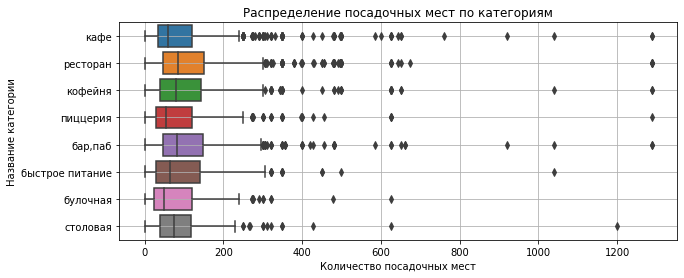

In [35]:
# Посмотрим распределение количества мест внутри каждой категории
# Строим диаграмму размаха значений
plt.figure(figsize=(10, 4))
sns.boxplot(data = df, x = 'seats', y = 'category')
plt.title('Распределение посадочных мест по категориям')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Название категории')
plt.grid()
plt.show()

Выбросы и хвосты говорят о том, что лучше использовать медиану вместо среднего значения или моды.

In [36]:
# Группировка по категориям и нахождение моды для столбца 'seats'
typical_seats = df.groupby('category')['seats'].median().sort_values(ascending=False)
print(typical_seats)

category
ресторан           86.0
бар,паб            82.0
кофейня            80.0
столовая           75.5
быстрое питание    65.0
кафе               60.0
пиццерия           55.0
булочная           50.0
Name: seats, dtype: float64


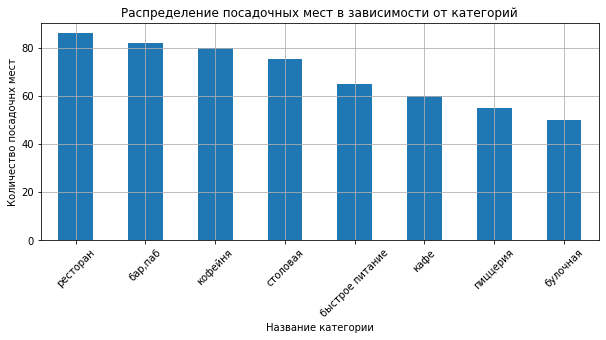

In [37]:
# Построим столбчатую диаграмму
plt.figure(figsize=(10, 4))
typical_seats.plot(kind='bar', rot = 45,
                   legend=False,
                   title=f'Распределение посадочных мест в зависимости от категорий')
plt.xlabel('Название категории')
plt.ylabel('Количество посадочнх мест')
plt.grid()
plt.show()

Анализ показал, что большинство посадочных мест расположено в категориях "ресторан", "бар,паб" и "кофейня" - больше 80. А в "булочной" около 50 -это наименьшее количество.

---

### Задача 5

Исследуйте рейтинг заведений. Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

In [38]:
# Изучаем статистические показатели столбца rating
print('Статистические показатели столбца rating:')
df['rating'].describe()

Статистические показатели столбца rating:


count    8402.000000
mean        4.230017
std         0.470320
min         1.000000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64

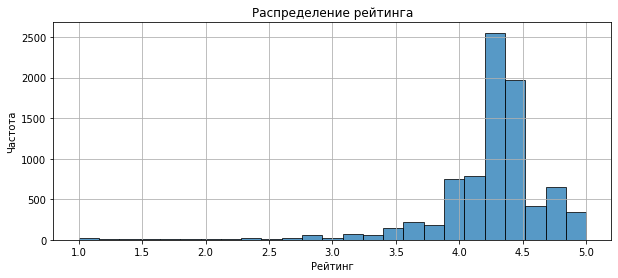

In [39]:
# Строим гистограмму распределения
plt.figure(figsize=(10, 4))
df['rating'].plot(
                kind='hist',
                bins=25, 
                alpha=0.75,
                edgecolor='black',
                rot=0)
plt.title('Распределение рейтинга')
plt.xlabel('Рейтинг')
plt.ylabel('Частота')
plt.grid()
plt.show()

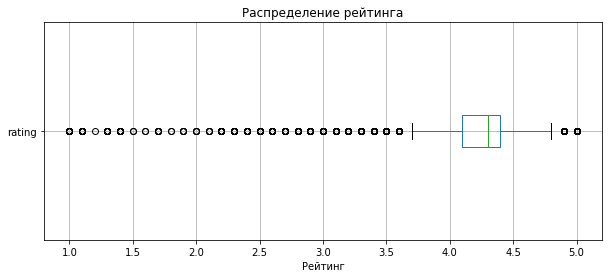

In [40]:
# Строим диаграмму размаха значений
plt.figure(figsize=(10, 4))
df.boxplot(column='rating', vert=False)
plt.title('Распределение рейтинга')
plt.xlabel('Рейтинг')
plt.show()

Гистограмма распределения асимметричная, скошанная влево. Дигарамма размаха показала большое количество выбросов слева, это означает что низкие рейтинги это редкость, их можно считать аномалиями, также как и рейтинги выше 4.7.

In [41]:
# Группировка по категориям и нахождение средних значений рейтинга
typical_rating = df.groupby('category')['rating'].mean().sort_values(ascending=False)
print(typical_rating)

category
бар,паб            4.387696
пиццерия           4.301264
ресторан           4.290402
кофейня            4.277282
булочная           4.268359
столовая           4.211429
кафе               4.124285
быстрое питание    4.050249
Name: rating, dtype: float64


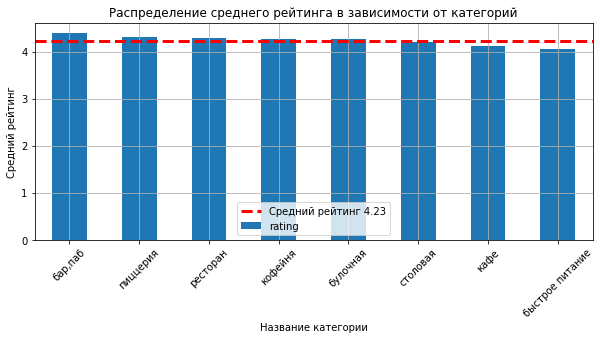

In [42]:
# Построим столбчатую диаграмму
plt.figure(figsize=(10, 4))
typical_rating.plot(kind='bar', rot = 45,
                   legend=False,
                   title=f'Распределение среднего рейтинга в зависимости от категорий')
plt.xlabel('Название категории')
plt.ylabel('Средний рейтинг')
plt.grid()
# Рассчитываем среднее значение рейтинга
mean_rating_share = df['rating'].mean()

# Наносим на график линию с средним значением рейтинга
plt.axhline(mean_rating_share, # Данные, по которым строится линия
            color='red', # Цвет линии
            linestyle='--', # Стиль линии
            linewidth=3,
           label=f'Средний рейтинг {round(mean_rating_share,2)}')
plt.legend()
plt.show()

Анализ показал, что в среднем наибольший рейтинг занимает категория "бар,паб" около 4.39, а наименьший рейтинг "быстрое питание" - около 4.05.

---

### Задача 6

Изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений? Постройте и визуализируйте матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберите самую сильную связь и проверьте её.

In [43]:
# Вычисляем корреляционную матрицу с использованием phi_k
correlation_matrix = df[['category', 'district', 'chain', 'seats', 'price', 'is_24_7','rating']].phik_matrix()

interval columns not set, guessing: ['chain', 'seats', 'rating']


In [44]:
# Выбор самой сильной связи (с рейтингом)
rating_correlations = correlation_matrix['rating'].sort_values(ascending=False)

In [45]:
# Самая сильная положительная корреляция
strongest_positive_corr = rating_correlations[1] # Исключаем саму корреляцию рейтинга с собой
strongest_positive_feature = rating_correlations.index[1]
display(strongest_positive_corr)

0.22029505623580847

Найдем к какому столбцу относится найденное значение и посмотрим на всю матрицу с помощью тепловой картыю

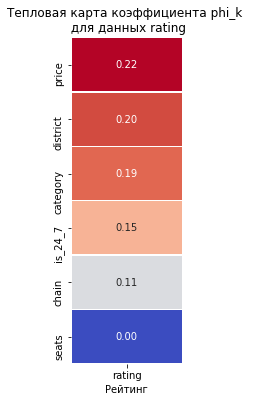

In [46]:
# Строим тепловую карту
plt.figure(figsize=(2, 6))

# Сохраняем матрицу корреляции признака rating с другими признаками клиента
data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
sns.heatmap(data_heatmap,
            annot=True, # Отображаем численные значения в ячейках карты
            fmt='.2f', # Форматируем значения корреляции: два знака после точки
            cmap='coolwarm', # Устанавливаем цветовую гамму от красного (макс. значение) к синему
            linewidths=0.5, # Форматируем линию между ячейками карты
            cbar=False # Отключаем цветовую шкалу
           )
plt.title('Тепловая карта коэффициента phi_k \n для данных rating')
plt.xlabel('Рейтинг')
plt.show()

Таким образом, самая сильная положительная корреяляция у рейтинга связана с категорией цен. Далее проверим связь рейтинга с ценовым диапозоном.

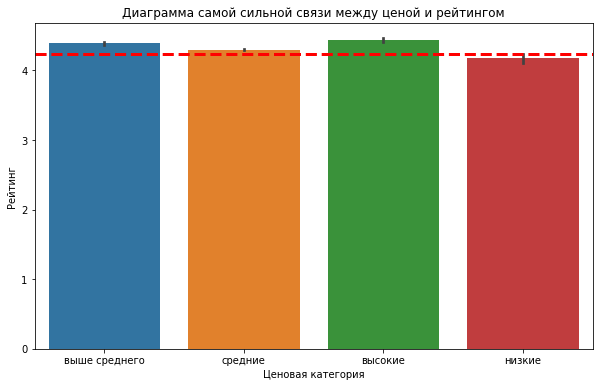

In [47]:
# Проверка самой сильной связи рейтинга с ценовым диапозоном
plt.figure(figsize=(10, 6))
sns.barplot(x=df[strongest_positive_feature], y=df['rating'])
plt.title('Диаграмма самой сильной связи между ценой и рейтингом')
plt.xlabel('Ценовая категория')
plt.ylabel('Рейтинг')
# Рассчитываем среднее значение рейтинга
mean_rating_share = df['rating'].mean()

# Наносим на график линию с средним значением рейтинга
plt.axhline(mean_rating_share, # Данные, по которым строится линия
            color='red', # Цвет линии
            linestyle='--', # Стиль линии
            linewidth=3) # Ширина линии)
plt.show()

Пронализировав диаграмму, можно сделать вывод, что наибольший рейтинг получают заведения с высокими ценами, а наименьший с низками. Это может быть связано с тем, что в местах где маленькие цены, хуже сервис и вкус еды.

---

### Задача 7

Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводите подходящими визуализациями.

In [48]:
#Фильтруем данные, оставляем только сетевые заведения (chain == 1)
df_networks = df[df['chain'] == 1]

In [49]:
# Применяем метод groupby и считаем количество заведений для каждого уникального названия
top_networks = df_networks.groupby('name').agg(
    count=('name', 'size'),
    avg_rating=('rating', 'mean'),
    category=('category', 'first')  # Извлекаем категорию для каждой сети (первое значение для каждой сети)
).reset_index()

In [50]:
# Сортируем по количеству заведений (count) и выбираем топ-15 самых популярных сетей
top_15_networks = top_networks.sort_values(by='count', ascending=False).head(15)

In [51]:
# Выводим топ-15 сетей для анализа
display(top_15_networks[['name', 'count', 'avg_rating', 'category']])

,name,count,avg_rating,category
729,шоколадница,120,4.177500,кофейня
335,домино'с пицца,76,4.169737,пиццерия
331,додо пицца,74,4.286486,пиццерия
146,one price coffee,71,4.064789,кофейня
742,яндекс лавка,69,3.872464,ресторан
58,cofix,65,4.075385,кофейня
168,prime,50,4.116000,ресторан
664,хинкальная,44,4.322727,быстрое питание
409,кофепорт,42,4.147619,кофейня
418,кулинарная лавка братьев караваевых,39,4.394872,кафе


Можно проследить тенденцию, что наиболее популярной сетью в Москве считаются кофейни. 

<Figure size 1080x504 with 0 Axes>

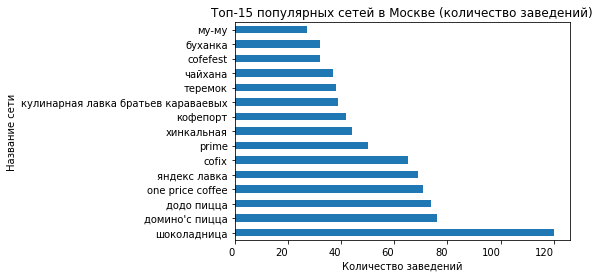

In [52]:
# Визуализируем топ-15 популярных сетей по количеству заведений 
plt.figure(figsize=(15, 7))
top_15_networks.plot(kind='barh', y = 'count', x = 'name', legend=False)
plt.title('Топ-15 популярных сетей в Москве (количество заведений)')
plt.xlabel('Количество заведений')
plt.ylabel('Название сети')
plt.xticks(rotation=0, ha='right')
plt.show()

Самой популярной сетью в Москве является кофейня "Шоколадница" с количеством завиденений равное 120. На втором и третьем месте с минимальной разницой в 76 и 74 заведений находятся пиццерии "Домино'с Пицца" и "Додо Пицца" соответсвенно. 

<Figure size 1080x504 with 0 Axes>

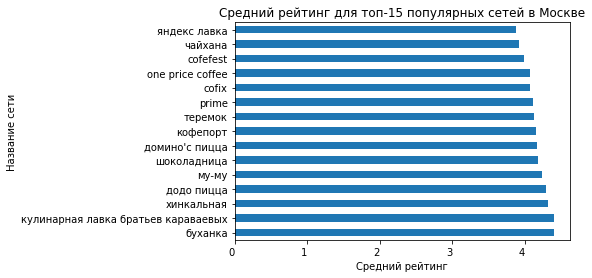

In [53]:
# Визуализируем топ-15 популярных сетей по среднему рейтингу заведений
plt.figure(figsize=(15, 7))
top15_rating = top_15_networks.sort_values(by='avg_rating', ascending=False)
top15_rating.plot(kind='barh', y = 'avg_rating', x = 'name',legend=False)
plt.title('Средний рейтинг для топ-15 популярных сетей в Москве')
plt.xlabel('Средний рейтинг')
plt.ylabel('Название сети')
plt.xticks(rotation=0, ha='right')
plt.show()

Хочется отметить что популярные сети в большинстве своем имееют хороший рейтинг (от 3.9 до 4.4). Так, наивысший рейтинг занимает булочная "Буханка" - 4.4, буквально на 0.002 балла меньше у кафе "Кулинарная лавка братьев Караваевых". Однако в топе 15 популярных сетей наименьший рейтинг занимает "Яндекс Лавка" - 3.9. 
При анализе также выяснилось, что если у сети много заведений, это не значит что у нее высокий рейтинг. Напимер, "Шоколадница" имеет рейтинг только 4.2.

---

### Задача 8

Изучите вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируйте цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводите подходящими визуализациями.


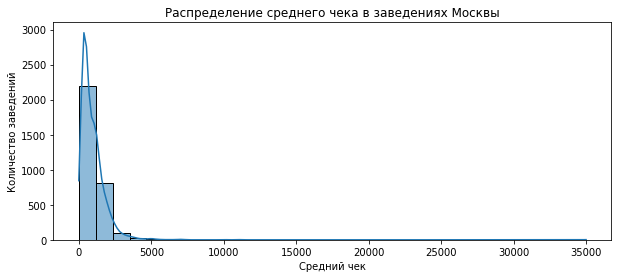

In [54]:
# Анализ распределения среднего чека в целом
# Строим гистограмму распределения
plt.figure(figsize=(10, 4))
sns.histplot(df['middle_avg_bill'], bins=30, kde=True)
plt.title('Распределение среднего чека в заведениях Москвы')
plt.xlabel('Средний чек')
plt.ylabel('Количество заведений')
plt.show()

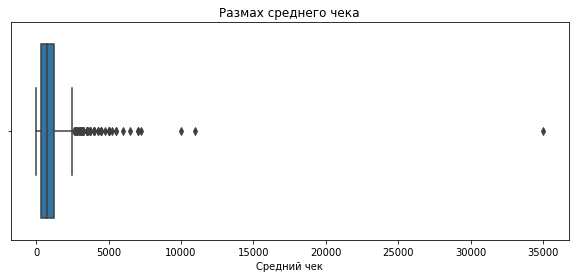

In [55]:
# Строим дигарамму размаха
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['middle_avg_bill'])
plt.title('Размах среднего чека')
plt.xlabel('Средний чек')
plt.show()

Визуализация показала ассиматрию, с хвостом в правую сторону. Это указывает, на возможные аномалии.

district
Западный административный округ            1000.0
Центральный административный округ         1000.0
Северо-Западный административный округ      700.0
Северный административный округ             650.0
Юго-Западный административный округ         600.0
Восточный административный округ            575.0
Северо-Восточный административный округ     500.0
Южный административный округ                500.0
Юго-Восточный административный округ        450.0
Name: middle_avg_bill, dtype: float64


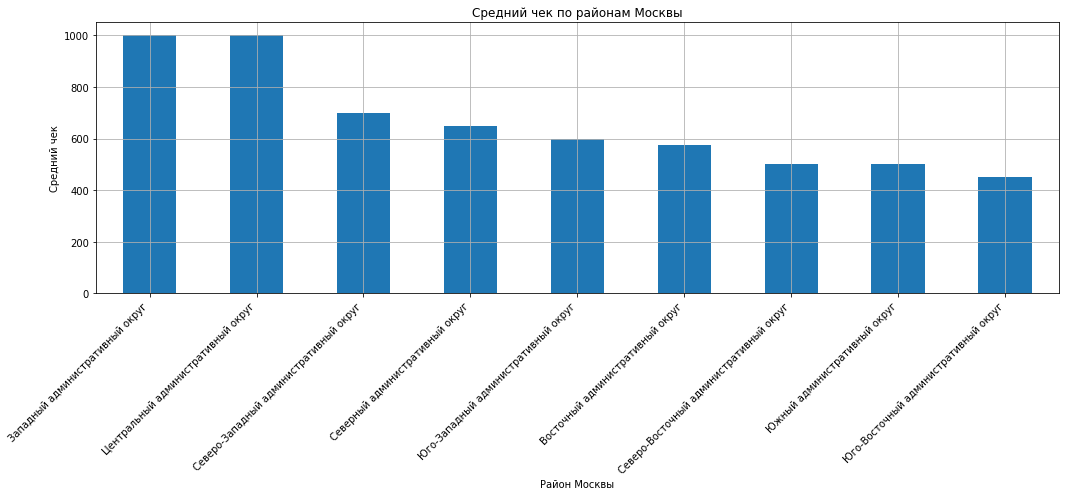

In [56]:
# Анализ среднего чека в зависимости от района Москвы, используя медиану
avg_bill_by_district = df.groupby('district')['middle_avg_bill'].median().sort_values(ascending=False)
print(avg_bill_by_district)

# Сразу строим визуализацию к полученным данным
plt.figure(figsize=(15, 7))
avg_bill_by_district.plot(kind='bar')
plt.title('Средний чек по районам Москвы')
plt.xlabel('Район Москвы')
plt.ylabel('Средний чек')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid()
plt.show()

Ожидаемо, что в Центральном районе оказались высокие средние чеки (1000), однако и в западном районе 1000 заведений, на третьем Северо-Западный район 700.

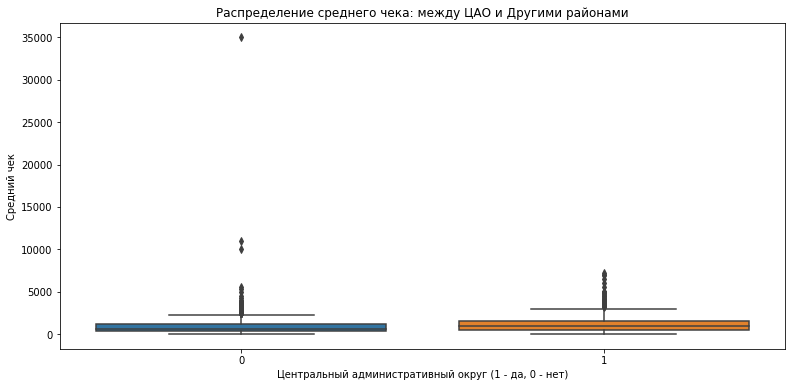


Описательная статистика для среднего чека в ЦАО:
count    1060.000000
mean     1191.057547
std       920.014707
min         0.000000
25%       500.000000
50%      1000.000000
75%      1500.000000
max      7250.000000
Name: middle_avg_bill, dtype: float64

Описательная статистика для среднего чека в других районах:
count     2089.000000
mean       839.822882
std       1032.624097
min         30.000000
25%        350.000000
50%        600.000000
75%       1150.000000
max      35000.000000
Name: middle_avg_bill, dtype: float64


In [57]:
# Анализ цен в Центральном административном округе (ЦАО) и других районах
cao_districts = ['Центральный административный округ']
df['is_cao'] = df['district'].apply(lambda x: 1 if x in cao_districts else 0) # Метка 1 - ЦАО, 0 - не ЦАО

plt.figure(figsize=(13, 6))
sns.boxplot(x='is_cao', y='middle_avg_bill', data=df)
plt.title('Распределение среднего чека: между ЦАО и Другими районами')
plt.xlabel('Центральный административный округ (1 - да, 0 - нет)')
plt.ylabel('Средний чек')
plt.show()

print("\nОписательная статистика для среднего чека в ЦАО:")
print(df[df['is_cao'] == 1]['middle_avg_bill'].describe())

print("\nОписательная статистика для среднего чека в других районах:")
print(df[df['is_cao'] == 0]['middle_avg_bill'].describe())

Таким образом, сравнивая Центральные район с другими, можно заметить, что:
- медианное значение в ЦАО больше 1000 > 600;
- стандартное отклонение ниже в ЦАО 920<1032;
- максимальное значение в Центральном районе ниже чем в других 7250<35000.

---

### Промежуточный вывод

Анализ взаимосвязи данных показал, что:

- В Москве наиболее популярны рестораны, кафе и кофейни. При этом больше всего заведений в Центральном административном округе Москвы.
- Более 60% из всех заведений не являются сетевыми, стоит отметить что в большинстве случаев сетевые заведения являются булочными.
- При анализе посадочных мест, оказвлось много выбросов. Но при этом можно выделить категорию ресторан, как заведение с большим количеством мест.
- Средний рейтинг по Москве составляет 4.23 из 5. При этом наибольший рейтинг у пабов и баров.
- Было выявлено, что наибольшая положительная связь у рейтинга с ценой. Это означет, чем выше цена, тем выше рейтинг.
- Если судить популярность по количеству открытых заведений, то на первом месте кофейня "Шоколадница" (120). А если анализировать по среднему рейтингу, то булочная "Буханка" (4.4).

---
# Итоговые выводы

**Общий обзор проделанной работы:**

В ходе исследования проанализировали данные 8402 заведений общественного питания в Москве. Акцентом в исследовании были такие данные,как: "административный район", "категория заведения", "является ли заведение сетевым", "средний чек", "количество посадочных мест" и "рейтинг".


**Ответы на исследовательские вопросы, или главные выводы:**

Исследовательский анализ данных позволил сделать следующие выводы:
* В Москве наибольшее количество заведений представляют рестораны, кафе и кофейни, причем наиболее сосредоточены они в Центральном административном округе, на втором месте Северный.  
* Более 60% всех заведений являются независимыми, и среди несетевых наиболее популярны бары и пабы, а среди сетевых заведений чаще всего встречаются булочные.  
* В процессе анализа посадочных мест было обнаружено много выбросов, однако рестораны выделяются среди остальных типов заведений благодаря большому количеству мест.  
* Средний рейтинг заведений в Москве составляет 4.23 из 5, причем высшие баллы наблюдаются у пабов и баров.  
* Наблюдается значимая положительная связь между рейтингом и ценой, что говорит о том, что более дорогие заведения получают более высокие оценки.  

**Рекомендации на основе анализа данных:**

В качестве рекомендаций можно указать, что компание "Shut Up and Take My Money" стоит подумать открыть ресторан в Центральном административном округе Москвы. Так как судя по анализу, средний чек в ЦАО выше чем в других регионах, в ресторане много посадочных мест для проведения торжеств и к тому же в среднем у ресторанов хорошие рейтинги, значит люди предпочитают туда ходить. Все эти факторы приведут к большой выручке.